# EDA (EXPLORATORY DATA ANALYSIS)

In [1]:
import pandas as pd

df = pd.read_excel('C://Users//Nitin//Downloads//Crude Oil Prices Daily.xlsx')
df.head(20)

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
5,1986-01-09,26.03
6,1986-01-10,25.65
7,1986-01-13,25.08
8,1986-01-14,24.97
9,1986-01-15,25.18


In [2]:
df.tail(20)

,Date,Closing Value
8203,2018-06-12,66.38
8204,2018-06-13,66.63
8205,2018-06-14,66.91
8206,2018-06-15,65.01
8207,2018-06-18,65.91
8208,2018-06-19,65.09
8209,2018-06-20,65.92
8210,2018-06-21,65.68
8211,2018-06-22,69.02
8212,2018-06-25,69.91


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8216 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


In [4]:
df.shape

(8223, 2)

In [5]:
df.isnull().sum()

Date             0
Closing Value    7
dtype: int64

## 7 missing values in column 'Closing value'

## Find rows with missing values in the 'Closing Value' column

In [6]:
missing_values = df[df['Closing Value'].isnull()]
print(missing_values)

           Date  Closing Value
8060 2017-11-23            NaN
8082 2017-12-25            NaN
8087 2018-01-01            NaN
8097 2018-01-15            NaN
8122 2018-02-19            NaN
8151 2018-03-30            NaN
8219 2018-07-04            NaN


## handling the missing values

In [7]:
df['Closing Value'].fillna(df['Closing Value'].mean(), inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8223 entries, 0 to 8222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8223 non-null   datetime64[ns]
 1   Closing Value  8223 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 128.6 KB


In [9]:
df.describe()

,Closing Value
count,8223.000000
mean,43.492139
std,29.604194
min,10.250000
25%,19.580000
50%,29.640000
75%,63.395000
max,145.310000


In [10]:
df.columns

Index(['Date', 'Closing Value'], dtype='object')

In [11]:
df.nunique()

Date             8223
Closing Value    4612
dtype: int64

# DATA VISUALIZATION

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

## Heatmap

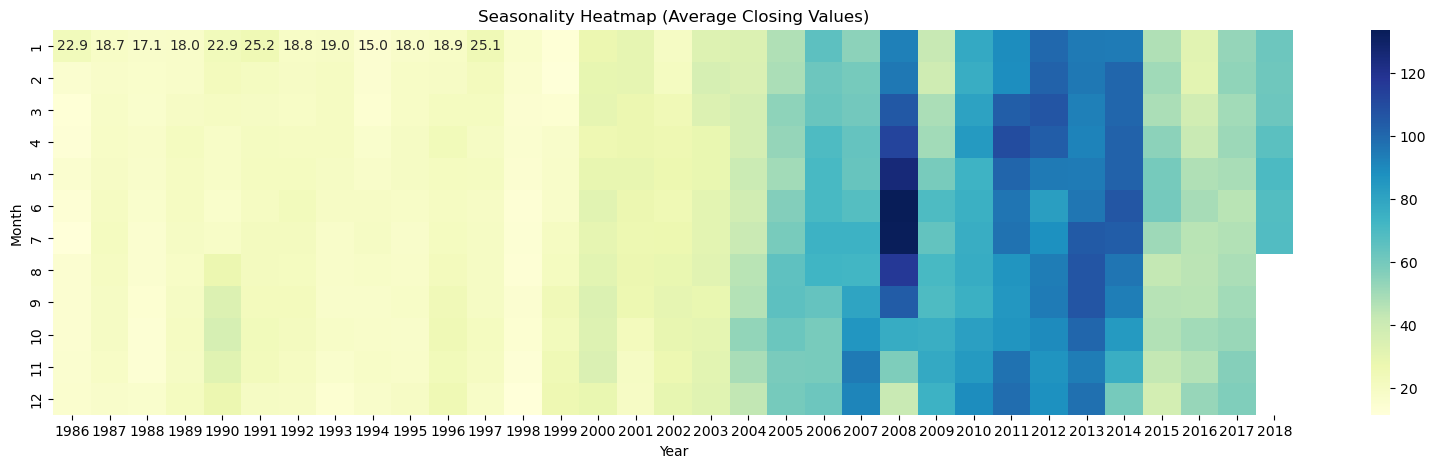

In [13]:
plt.figure(figsize=(20, 5))
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create 'Year' and 'Month' columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Create the pivot table with 'Month' as index and 'Year' as columns
pivot_table = df.pivot_table(values='Closing Value', index='Month', columns='Year', aggfunc='mean')

# Plot heatmap
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title('Seasonality Heatmap (Average Closing Values)')
plt.show()

### Key Observations:
1. **Seasonality:**
   - In earlier years (1986 to the early 2000s), the prices were much lower (green/yellow shades) compared to later years (2000 onward), which show a significant rise in prices (blue shades).
   - There are noticeable fluctuations in certain months, indicating that prices vary seasonally. For example, prices in July and August tend to be higher in later years, reflecting trends in crude oil pricing.

2. **Empty Spaces in 2018:**
   - The empty spaces in the year **2018** indicate missing data. Since these months are missing values, it suggests that the dataset does not have closing values for those months of 2018.
   - This could be due to incomplete data collection for 2018, or perhaps the data only extends to the early part of the year (e.g., January to February).

3. **Trends:**
   - There's a clear **upward trend in crude oil prices** from the late 1990s to around 2010. The price hike during this period (deep blue) coincides with major geopolitical events, economic booms, and crises in oil-producing regions.
   - A peak can be observed around 2008 (likely reflecting the global financial crisis and its impact on crude oil prices).
   - After 2014, prices seem to fall and stabilize at a relatively lower level, possibly reflecting changes in the global oil market.

### Summary:
- The heatmap provides a visual representation of how crude oil prices varied across months and years, revealing both seasonal patterns and long-term trends.
- **Highs and Lows:**
  - Prices tend to increase around mid-year (June, July, and August) in many years, suggesting a possible seasonal influence.
  - The years 2005–2008 show particularly high crude oil prices, reflecting a peak in global oil demand and market conditions.
  - Prices dropped around 2014–2015 and stayed relatively stable afterward.
- **Missing data in 2018:** The gaps in 2018 indicate that data for those months were either unavailable or not recorded.

This visualization helps in understanding both **seasonal variations** and **long-term shifts** in crude oil prices over the years.

## Scatter plot

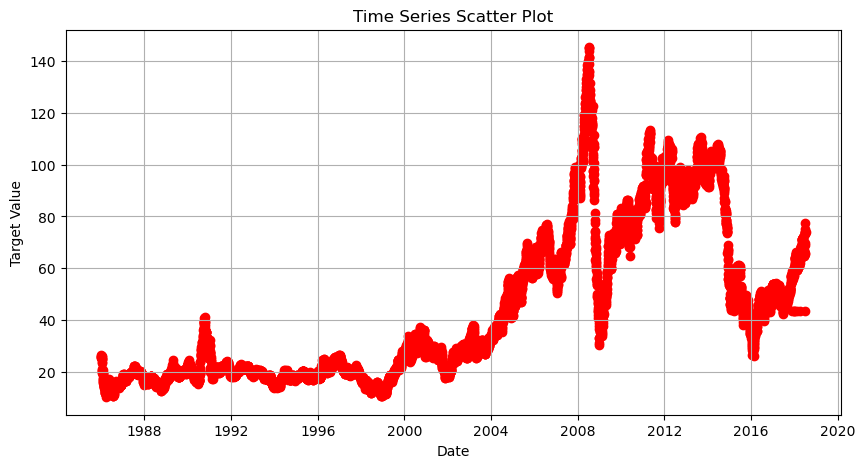

In [14]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Date'], df['Closing Value'], color='r')
plt.title('Time Series Scatter Plot')
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.grid(True)
plt.show()


## Histogram

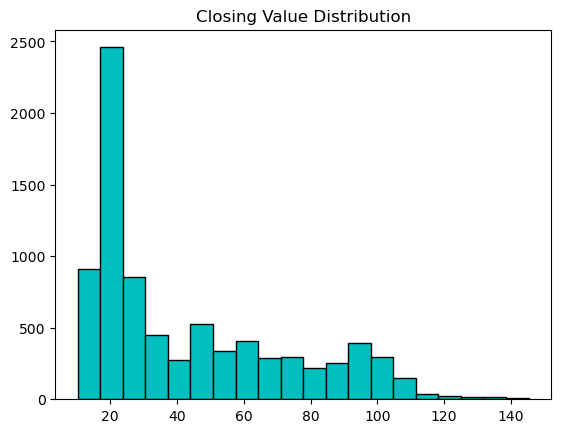

In [15]:
plt.hist(df['Closing Value'], bins=20, color='c', edgecolor='black')
plt.title('Closing Value Distribution')
plt.show()

### Key Observations:
1. **Skewed Distribution:**
   - The distribution is **right-skewed**, indicating that most of the closing values are concentrated in the lower range, while a few closing values are much higher.
   - The majority of the closing values fall between **10 and 30**, represented by the first few bars. This indicates that most of the time, crude oil prices have been on the lower side.
   
2. **Outliers:**
   - There are some **outliers** on the right side of the distribution, represented by bars extending beyond **100**. These high values occurred less frequently, as reflected by the smaller bar heights.
   
3. **Range and Frequency:**
   - The bins in the histogram are spaced in intervals of around **5–10**, with the **highest frequency** of closing values between **15 and 25**. The counts gradually decrease as the closing values increase, indicating fewer occurrences of higher prices.
   
4. **Summary of Frequencies:**
   - The highest bar corresponds to over **2,500 occurrences** for prices between **15–20**, making this the most common price range in the dataset.
   - There are significantly fewer occurrences of prices above **50**, with the bars in those ranges getting progressively shorter.

### Summary:
The histogram illustrates that crude oil prices are most often in the **lower range (10–30)**, with relatively fewer instances of very high prices. This aligns with the data's historical context, where prices have stayed low for much of the early periods, with spikes occurring during specific events or periods of increased demand or supply disruptions.

The outliers are noteworthy but do not dominate the overall price distribution. Therefore, removing them may not be necessary unless they significantly impact the analysis you are conducting.

## Bar Plot

C:\Users\Nitin\AppData\Local\Temp\ipykernel_7396\4199335442.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_data = df.groupby('Year').mean()


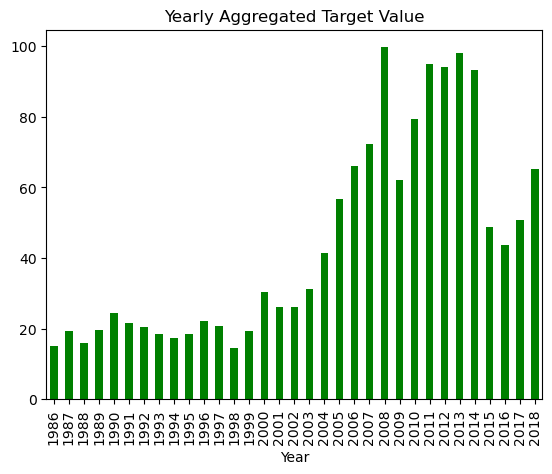

In [16]:
df['Year'] = df['Date'].dt.year
yearly_data = df.groupby('Year').mean()
yearly_data['Closing Value'].plot(kind='bar', color='g')
plt.title('Yearly Aggregated Target Value')
plt.show()

### Key Observations:
1. **1986–1999:**
   - Crude oil prices remained relatively low and stable, with minor fluctuations year over year.
   - The values were below **20–30** during this period, reflecting a phase of relatively low oil prices.

2. **2000–2004:**
   - Starting around **2000**, the prices began to rise steadily. This period marked the beginning of increased global demand for crude oil, along with supply constraints and geopolitical tensions in oil-producing regions.
   - There is a gradual but noticeable increase in the bars from 2000 to 2004, showing the start of a significant upward trend.

3. **2005–2011 (Sharp Peak):**
   - There is a sharp increase from **2005 to 2008**, with crude oil prices reaching a peak of **around 100** by 2008. This period coincides with the global economic boom and the 2008 financial crisis, which caused oil prices to spike to record levels.
   - From **2009 to 2011**, prices remained high (close to 90–100), likely reflecting the market's recovery post-crisis and continuing demand.

4. **2012–2014 (Sustained High Prices):**
   - Prices stayed relatively high during this period, hovering around **90–100**. This could be due to a combination of geopolitical factors, demand growth from emerging markets, and constrained oil supplies.

5. **2015–2016 (Sharp Drop):**
   - A noticeable drop occurred in **2015** and **2016**, where the prices fell significantly. This was due to a supply glut in global oil markets, primarily driven by the shale oil boom in the United States and a slowdown in global demand.
   - The bars for these years drop to around **50**.

6. **2017–2018 (Recovery):**
   - There is some recovery in **2017 and 2018**, with prices rising again to around **60–70**. This might be due to efforts by OPEC and other major oil producers to stabilize the market by cutting production.

### Summary:
- The chart shows a long period of **low prices** from **1986 to the late 1990s**, followed by a sharp increase starting in the **early 2000s**, peaking around **2008**.
- The **2008 financial crisis** caused a spike in prices, with values staying high until **2014**.
- After 2014, there was a sharp decline due to oversupply in global markets, but by **2017**, prices began to recover, although they did not return to the previous peak levels.

This chart highlights the volatility of crude oil prices over time, influenced by various **economic, geopolitical, and market-driven factors**.

## Box plot using matplotlib

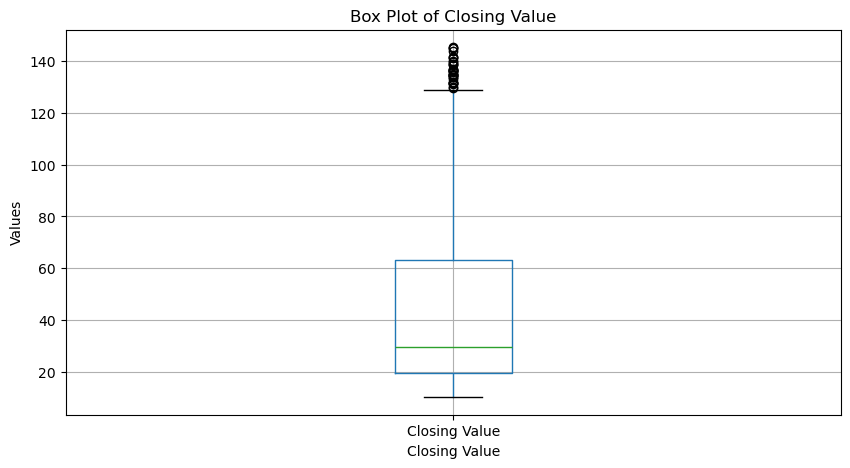

In [17]:
# Box plot for Closing Value only, since Date is not numerical
plt.figure(figsize=(10, 5))
df[['Closing Value']].boxplot()  # Only plot numerical column(s)
plt.title('Box Plot of Closing Value')
plt.xlabel('Closing Value')
plt.ylabel('Values')
plt.show()

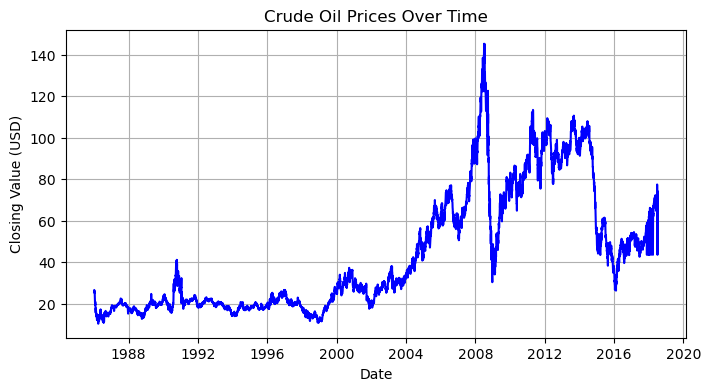

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(df['Date'], df['Closing Value'], color='b')
plt.title('Crude Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Value (USD)')
plt.grid(True)
plt.show()

# Observation:-The plot shows how crude oil prices have changed over time:

**Fluctuations: The prices go up and down a lot, with some big spikes and drops. These changes might be due to important events, like economic issues or changes in supply and demand. Overall Trend: Over time, the prices generally move upward, though there are some sharp decreases along the way. The chart gives a clear overview of how crude oil prices have behaved over the years.**

In [19]:
df

,Date,Closing Value,Year,Month
0,1986-01-02,25.560000,1986,1
1,1986-01-03,26.000000,1986,1
2,1986-01-06,26.530000,1986,1
3,1986-01-07,25.850000,1986,1
4,1986-01-08,25.870000,1986,1
...,...,...,...,...
8218,2018-07-03,74.190000,2018,7
8219,2018-07-04,43.492139,2018,7
8220,2018-07-05,73.050000,2018,7
8221,2018-07-06,73.780000,2018,7


# ARIMA Model

In [20]:
# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [22]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test on the closing value
result = adfuller(df['Closing Value'])

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -2.018911074338179
p-value: 0.27834330038335114


# if the p-value is less than 0.05, the data is stationary, and you may not need to difference it (d=0). If the data is non-stationary,will  d=1 or higher, WE TAKING D=1

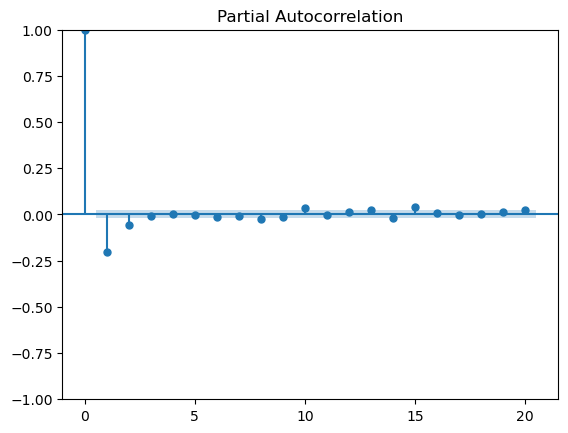

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt
d=1
# Plot PACF
plot_pacf(df['Closing Value'].diff(d).dropna(), lags=20)
plt.show()


In [28]:
#The first lag (lag 1) shows a significant spike above the confidence interval, indicating that an autoregressive term might be needed for lag 1.
#After lag 1, the partial autocorrelations appear to be within the confidence interval and close to zero.hence p=1

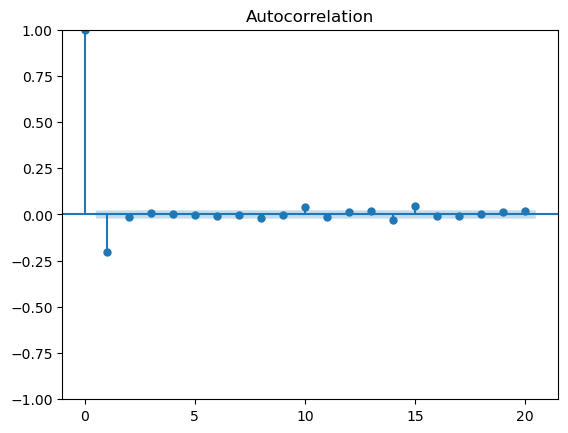

In [29]:
from statsmodels.graphics.tsaplots import plot_acf
#Determine q (moving average term):
# Plot ACF
plot_acf(df['Closing Value'].diff(d).dropna(), lags=20)
plt.show()


In [ ]:
#In this case:

#The first lag (lag 1) shows a significant spike above the confidence interval, indicating that an MA term might be needed for lag 1.
#After lag 1, the autocorrelations fall within the confidence interval and remain close to zero.
#Conclusion:
#Based on this ACF plot, the appropriate value for q would be 1.

In [36]:
# Number of days to use for the test set
test_size = 365

# Split data into train and test sets
train = df[:-test_size]  # All data except the last 365 rows
test = df[-test_size:]   # The last 365 rows

In [39]:
# Fit ARIMA model
model = ARIMA(train['Closing Value'], order=(1, 1, 1))
results = model.fit()

In [40]:
predictions = results.forecast(steps=test_size)

In [44]:
# Calculate MSE and R² for ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test['Closing Value'], predictions)
# Calculate RMSE
rmse = np.sqrt(mse)
r2 = r2_score(test['Closing Value'], predictions)
print(f'ARIMA MSE: {mse}')
print(f'ARIMA R²: {r2}')
print(f'ARIMA RMSE: {rmse}')

ARIMA MSE: 76.42420980012118
ARIMA R²: -0.06438686361002399
ARIMA RMSE: 8.742094131277767


# SARIMA Model

In [46]:
# Fit SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['Closing Value'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

In [47]:
# Make predictions
predictions = results.forecast(steps=test_size)

In [102]:
# Calculate MSE and R² for SARIMA
mse = mean_squared_error(test['Closing Value'], predictions)
r2 = r2_score(test['Closing Value'], predictions)
# Calculate RMSE
rmse = np.sqrt(mse)
print(f'SARIMA MSE: {mse}')
print(f'SARIMA R²: {r2}')
print(f'SARIMA RMSE: {rmse}')

SARIMA MSE: 303.0343686109646
SARIMA R²: -3.2204662896149054
SARIMA RMSE: 17.407882370092135


# FBProphet Model

In [61]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


In [59]:
print(df.columns)


Index(['Date', 'Closing Value'], dtype='object')


In [63]:
# Prepare the training data for FBProphet
train_df = train.reset_index().rename(columns={'Date': 'ds', 'Closing Value': 'y'})
test_df = test.reset_index().rename(columns={'Date': 'ds', 'Closing Value': 'y'})


In [64]:
# Fit the Prophet model
from prophet import Prophet
model = Prophet()
model.fit(train_df)

16:40:42 - cmdstanpy - INFO - Chain [1] start processing
16:40:53 - cmdstanpy - INFO - Chain [1] done processing


In [65]:
# Make future dataframe for predictions
future = model.make_future_dataframe(periods=test_size)
forecast = model.predict(future)

In [66]:
# Extract predicted values for the test set
predictions = forecast['yhat'][-test_size:].values

In [96]:
# Calculate MSE and R² for FBProphet
mse = mean_squared_error(test['Closing Value'], predictions)
r2 = r2_score(test['Closing Value'], predictions)
# Calculate RMSE
rmse = np.sqrt(mse)
print(f'FBProphet MSE: {mse}')
print(f'FBProphet R²: {r2}')
print(f'FBProphet RMSE: {rmse}')

FBProphet MSE: 303.0343686109646
FBProphet R²: -3.2204662896149054
FBProphet RMSE: 17.407882370092135


# LSTM Model

In [69]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['Closing Value'].values.reshape(-1, 1))

In [87]:
test_size = 365
# Split data into train and test sets
train = df[:-test_size]  # All data except the last 365 rows
test = df[-test_size:]   # The last 365 rows


In [88]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['Closing Value'].values.reshape(-1, 1))

In [89]:
train_scaled = data_scaled[:-test_size]
test_scaled = data_scaled[-test_size:]

In [90]:
# Prepare the data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time_step for LSTM
time_step = 60
X_train, y_train = create_dataset(train_scaled, time_step)
X_test, y_test = create_dataset(test_scaled, time_step)

# Reshape the data to be 3D for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [75]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [78]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM


In [91]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

C:\Users\Nitin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [92]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 152ms/step - loss: 0.0168 - val_loss: 7.4304e-04
Epoch 2/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 19s 136ms/step - loss: 3.3862e-04 - val_loss: 7.2088e-04
Epoch 3/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 16s 132ms/step - loss: 2.9690e-04 - val_loss: 7.2488e-04
Epoch 4/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - loss: 2.7710e-04 - val_loss: 7.9407e-04
Epoch 5/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - loss: 2.7877e-04 - val_loss: 7.9908e-04
Epoch 6/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - loss: 2.6605e-04 - val_loss: 7.1061e-04
Epoch 7/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - loss: 2.2094e-04 - val_loss: 7.1385e-04
Epoch 8/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - loss: 2.1212e-04 - val_loss: 7.4018e-04
Epoch 9/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 142ms/step - loss: 2.1863e-04 - val_loss: 7.0037e-04
Epoch 10/10
122/122 ━━━━━━━━━━━━━━━━━━━━ 23s 164ms/step - loss: 1.9658e-04 - val_loss: 7.0450e-04


In [93]:
# Make predictions on the test set
test_predict = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step


In [94]:
# Inverse transform the predictions and the actual test values
test_predict = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [97]:
# Calculate MSE and R² for LSTM
mse = mean_squared_error(y_test_actual, test_predict)
r2 = r2_score(y_test_actual, test_predict)
# Calculate RMSE
rmse = np.sqrt(mse)
print(f'LSTM MSE: {mse}')
print(f'LSTM R²: {r2}')
print(f'LSTM  RMSE: {rmse}')

LSTM MSE: 12.850872676378259
LSTM R²: 0.8341903113421498
LSTM  RMSE: 3.584811386443959


In [99]:
#plot the predictions vs actual values
import matplotlib.pyplot as plt

In [100]:
# Prepare the full dataframe with predictions and actual values
df['Predicted'] = np.nan
df.iloc[-test_size + time_step + 1:, df.columns.get_loc('Predicted')] = test_predict.flatten()

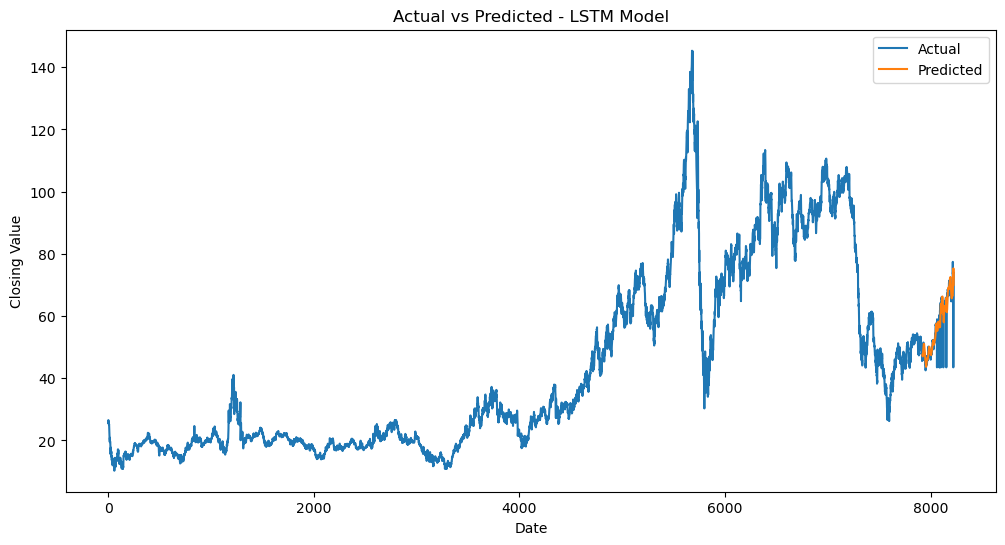

In [101]:
# Plot the actual values and predictions
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Closing Value'], label='Actual')
plt.plot(df.index, df['Predicted'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.title('Actual vs Predicted - LSTM Model')
plt.legend()
plt.show()

# Comparison

In [103]:
import pandas as pd

# Create a DataFrame to store model comparison
data = {
    'Model': ['ARIMA', 'SARIMA', 'FBProphet', 'LSTM'],
    'MSE': [76.42420980012118, 303.0343686109646, 303.0343686109646, 12.850872676378259],
    'R²': [-0.06438686361002399, -3.2204662896149054, -3.2204662896149054, 0.8341903113421498],
    'RMSE': [8.742094131277767, 17.407882370092135, 17.407882370092135, 3.584811386443959],
}

comparison_df = pd.DataFrame(data)

# Display the comparison table
print(comparison_df)

       Model         MSE        R²       RMSE
0      ARIMA   76.424210 -0.064387   8.742094
1     SARIMA  303.034369 -3.220466  17.407882
2  FBProphet  303.034369 -3.220466  17.407882
3       LSTM   12.850873  0.834190   3.584811
